In [25]:
import cv2
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

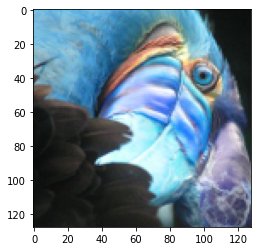

In [44]:
img = cv2.imread("/content/drive/MyDrive/input.png")

height, width, channels = np.shape(img)
points_list = []

for i in range(width):
  for j in range(height):
    pixel = img[j][i]
    points_list.append(pixel)
plt.imshow(img)


In [45]:
# Based on "K" value and centroids allocating Pixels from image
def allot(centroid_lst, lst):
  clusters = []
  for i in centroid_lst:
    clusters.append([])
  #print("clusters lst len: ", len(clusters))
  for echpoint in lst:
    distances = []
    for centroid in centroid_lst:
      d = 0
      for i in range(3):
        d = d + (centroid[i] - echpoint[i])**2
        d = np.sqrt(d)
      distances.append(d)
    min_dist = min(distances)
    min_dist_index = distances.index(min_dist)
    #print(min_dist_index)
    clusters[min_dist_index].append(echpoint)
  return clusters

After the clusters are formed using the aforementioned procedure, the cluster centriod needs to be updated by averaging the R, G, and B values.

In [49]:
def update_centroid(clusters_allocated):
  new_centroid_lst = []
  for echcluster in clusters_allocated:
    R = 0
    G = 0
    B = 0
    for ech_point in echcluster:
      R += ech_point[0]
      G += ech_point[1]
      B += ech_point[2]

    new_centroid_lst.append([R/len(echcluster), G/len(echcluster), B/len(echcluster)])
    
  return new_centroid_lst

In [50]:
# Defining convergence condition
def convergence(clusters_allocated_1, clusters_allocated_2, K):
  for i in range(K):
    if len(clusters_allocated_1[i]) != len(clusters_allocated_2[i]):
      return True
  return False

In [51]:
# Choosing ideal K based on elbow method
def elbow_method(k_lst, lst):
  cost_lst = []
  for k in k_lst:
    centroid_lst = []
    for pt in range(k):
      rand_centroids = rand.choice(lst)
      centroid_lst.append(rand_centroids)
    #print("-- ", centroid_lst)
    flag = True
    clusters_old = allot(centroid_lst, lst)
    centriod_old = update_centroid(clusters_old)
    while flag:
      cluster_new = allot(centriod_old, lst)
      centroid_new = update_centroid(cluster_new)

      flag = convergence(cluster_new, clusters_old, k)
      clusters_old = cluster_new
    #print("K: ", pt, " ---- ", len(clusters_allocated[0]), " -- ", len(clusters_allocated[1]), " -- Total:", len(clusters_allocated[0]) + len(clusters_allocated[1]))
    val = cost(lst, centroid_new, cluster_new)
    #print(val)
    cost_lst.append(val)
  return cost_lst


In [52]:
# Sum of Squared for determining the distance between the centroid and the associated cluster
def cost(points_lst, centroids, clusters):
  total_clusters = len(centroids)
  ind = 0
  sum = 0
  for cluster in clusters:
    for echpoint in cluster:
      sum += (echpoint[0] - centroids[ind][0]) + (echpoint[1] - centroids[ind][1]) + (echpoint[2] - centroids[ind][2])**2
    ind += 1
  #print(sum)
  return sum

In [53]:
def kmeans(k, lst):
  centroid_lst = []
  for pt in range(k):
    rand_centroids = rand.choice(lst)
    centroid_lst.append(rand_centroids)
  flag = True
  clusters_old = allot(centroid_lst, lst)
  centriod_old = update_centroid(clusters_old)
  while flag:
    cluster_new = allot(centriod_old, lst)
    centroid_new = update_centroid(cluster_new)

    flag = convergence(cluster_new, clusters_old, k)
    clusters_old = cluster_new
  #print("K: ", pt, " ---- ", len(clusters_allocated[0]), " -- ", len(clusters_allocated[1]), " -- Total:", len(clusters_allocated[0]) + len(clusters_allocated[1]))
  return cluster_new, centroid_new

In [54]:
# replacing pixels with a centriod value if present
def check(pixel, cluster_):
  for i in cluster_:
    if i[0] == pixel[0] and i[1] == pixel[1] and i[2] == pixel[2]:
      return True
  return False

In [69]:
# Get the best value for K
k_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cost_lst = elbow_method(k_lst, points_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Text(0, 0.5, 'Cost')

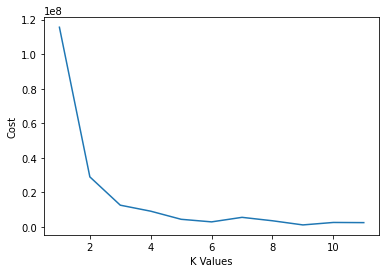

In [70]:
plt.plot(k_lst, cost_lst)
plt.xlabel("K Values")
plt.ylabel("Cost")

In [71]:
# Use best found value of K
k = 2
optimal_cluster, optimum_centriod = kmeans(k, points_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


In [79]:

img_comp = cv2.imread("/content/drive/MyDrive/input.png")
height, width, channels = np.shape(img)
not_allocated = 0
for i in range(width):
  for j in range(height):
    pixel = img_comp[j][i]
    if check(pixel, optimal_cluster[0]):
      img_comp[j][i] = optimum_centriod[0]
    elif check(pixel, optimal_cluster[1]):
      img_comp[j][i] = optimum_centriod[1]
    elif check(pixel, optimal_cluster[2]):
      img_comp[j][i] = optimum_centriod[2]
    elif check(pixel, optimal_cluster[3]):
      img_comp[j][i] = optimum_centriod[3]
    else:
      not_allocated += 1
print("Not allocated: ", not_allocated)

Not allocated:  0


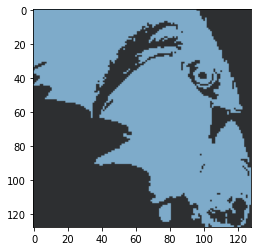

In [80]:
# Compressed image
plt.imshow(img_comp)

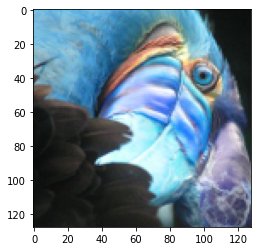

In [60]:
#Orignal input file
plt.imshow(img)